In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import os
import random
from tabulate import tabulate
import math

In [31]:
def generate_noisy():
    
    x = []
    y = []

    def fx(x):        
        return 1/(x**2 - 3*x + 2)

    for k in range(1000):
        xk = 3*k/1000
        x.append(xk)
        fxk = fx(xk)
        delta = np.random.normal(0,1)

        if fxk < -100:            
            y.append(-100 + delta)
        elif fxk >= -100 and fxk <= 100:            
            y.append(fxk + delta)
        else:            
            y.append(100 + delta)
        
    return np.array(x), np.array(y)

def _rational(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

def rational(init_point, *args):
    a, b, c, d = init_point
    x, y = args[0], args[1]
    return np.sum((_rational(x, a, b, c, d) - y)**2)

def rational_resid(init_point, *args):
    a, b, c, d = init_point
    x, y = args[0], args[1]

    return abs(_rational(x, a, b, c, d) - y)

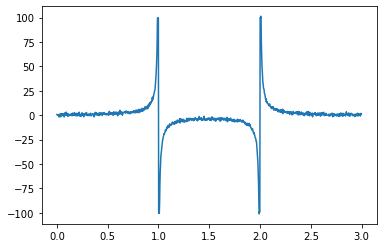

In [32]:
x,y = generate_noisy()
error = 0.001
init_point = [1,-1,-1,1]

plt.plot(x, y)
plt.show()

In [33]:
nelder = optimize.minimize(rational, init_point, args=(x, y), method='nelder-mead', tol=error, options={'disp': True})
na, nb, nc, nd = nelder['x']
print(nelder['x'])

Optimization terminated successfully.
         Current function value: 159387.220319
         Iterations: 381
         Function evaluations: 654
[ 0.46868963 -0.93744433 -4.00071403  4.00143178]


In [34]:
levenberg = optimize.least_squares(rational_resid, init_point, args=(x, y), method='lm', xtol=error)
la, lb, lc, ld = levenberg['x']
print(f'Current function value: {levenberg["cost"]}')
print(f'Function Calls: {levenberg["nfev"]}')
print(levenberg['x'], end='\n\n')

Current function value: 121241.63089752002
Function Calls: 141
[-2.39031235  2.399753   -2.02713833  1.03374704]



In [35]:
bounds = [(-7, 4), (-7, 4), (-7, 4), (-7, 4)]
evolution = optimize.differential_evolution(rational, bounds, args=(x, y), tol=error)
ea, eb, ec, ed = evolution['x']
print(evolution)

     fun: 136066.70225887786
     jac: array([-206834.30089528, -207865.56601851,  405533.87617354,
        386356.46577107])
 message: 'Optimization terminated successfully.'
    nfev: 8460
     nit: 139
 success: True
       x: array([-0.99038634,  0.9908374 , -2.00085827,  1.00087405])


In [36]:
annealing = optimize.dual_annealing(rational, bounds, args=(x, y))
aa, ab, ac, ad = annealing['x']
print(annealing)

     fun: 136057.78588246027
 message: ['Maximum number of iteration reached']
    nfev: 8931
    nhev: 0
     nit: 1000
    njev: 186
  status: 0
 success: True
       x: array([-0.99975461,  1.00023851, -2.00092014,  1.00093626])


In [37]:
headers = ['a', 'b', 'c', 'd', 'Fx value', 'Iterations', 'Fx calls']
index = ['Differential Evolution', 'Simulated Annealing', 'Nelder-Mead', 'Levenberg-Marquadt']
table = [
    [ea, eb, ec, ed, evolution['fun'], evolution['nit'], evolution['nfev']],
    [aa, ab, ac, ad, annealing['fun'], annealing['nit'], annealing['nfev']],
    [na, nb, nc, nd, nelder['fun'], nelder['nit'], nelder['nfev']],    
    [la, lb, lc, ld, levenberg['cost'], levenberg['nfev'], levenberg['nfev']],
]

print('Table Comparison')
print(tabulate(table, headers=headers, showindex=index))

Table Comparison
                                a          b         c        d    Fx value    Iterations    Fx calls
----------------------  ---------  ---------  --------  -------  ----------  ------------  ----------
Differential Evolution  -0.990386   0.990837  -2.00086  1.00087      136067           139        8460
Simulated Annealing     -0.999755   1.00024   -2.00092  1.00094      136058          1000        8931
Nelder-Mead              0.46869   -0.937444  -4.00071  4.00143      159387           381         654
Levenberg-Marquadt      -2.39031    2.39975   -2.02714  1.03375      121242           141         141


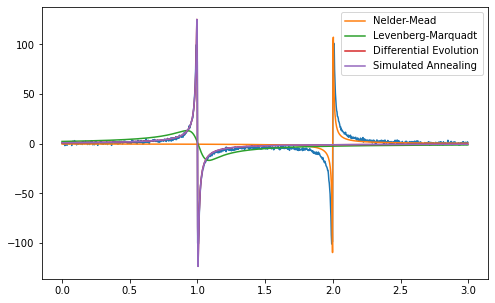

In [38]:
plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, _rational(x, na, nb, nc, nd), label='Nelder-Mead')
plt.plot(x, _rational(x, la, lb, lc, ld), label='Levenberg-Marquadt')
plt.plot(x, _rational(x, ea, eb, ec, ed), label='Differential Evolution')
plt.plot(x, _rational(x, aa, ab, ac, ad), label='Simulated Annealing')
plt.legend()
plt.show()